## Quick set up of applying weights to multiple rasters
Created by: Derek Robinson<br>
Date: 2021_07_20

In [ ]:
Load the required libraries

In [16]:
library(raster)

Load in the raster data and create `raster()` objects. <br> Here I create criteria rasters using the same raster data layer so that they all have the same dimensions since I don't have time to find 4 that are the same extent and resolution.

In [18]:
c1 <- c2 <- c3 <- c4 <- raster("./ClassifiedRasterData//Wetland2Raster.tif")

This next statement was your question to me in your code

In [19]:
#weightings to be used for the raster input
#Prof- would I need to add multiple weights into this
w = 0.5

My answer is, that you can do it all individually as I show you in the next couple of steps, but it would be much better to specify a string, vector, or array of values and use that to implement the weights for all criteria. I'll show you how to do this for one set of weights. You should be able to modify what I provided here to create a vector of vectors of weights so that you could have 10 sets of weights and run them all at once similar to what I show you below.

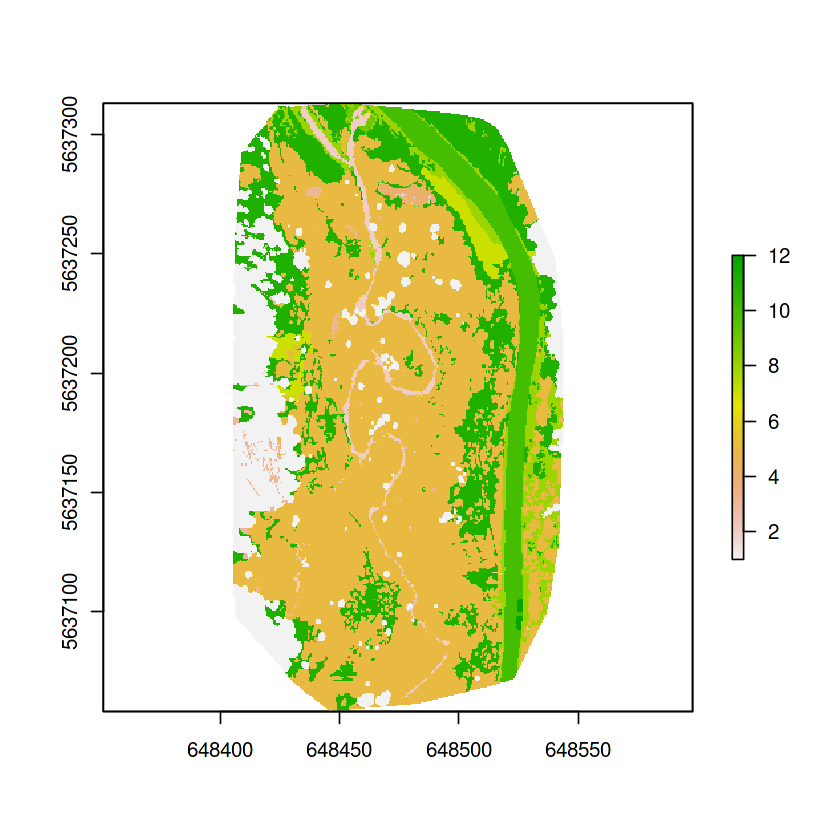

In [20]:
#loop through the raster and multiply raster by the wight
#for i in band1:
#    dr= i * w

plot(c1)

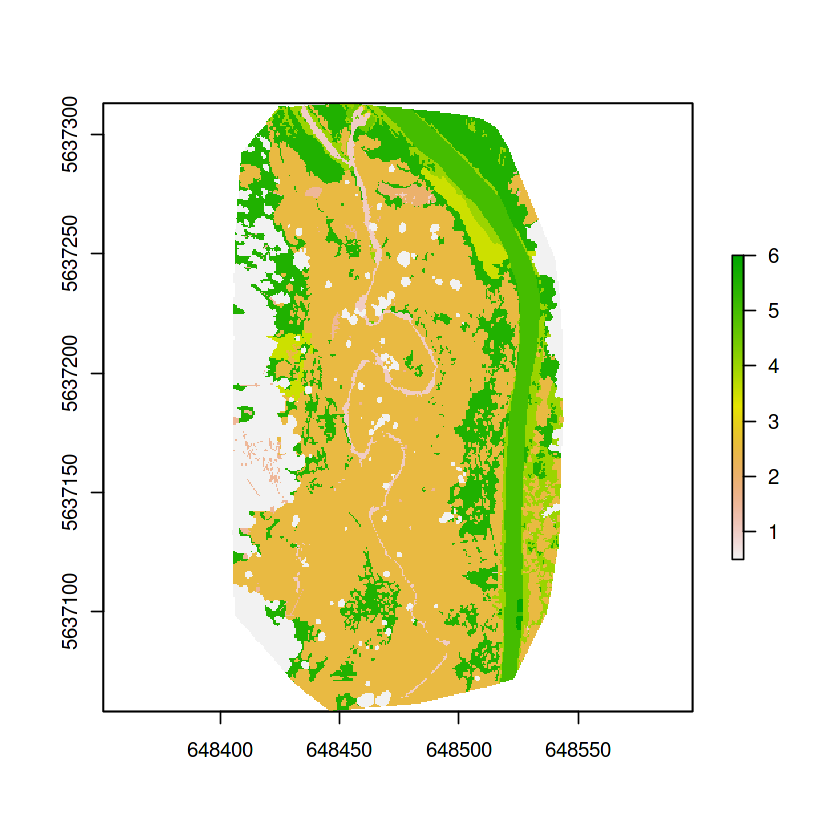

In [21]:
# evidence that the weight multiplied by the criterion works.
plot (c1 * w)

However, as noted above, you probably want to have all your weights specified first in a string and then run them for all criteria and not just one criterion at a time. 

In [22]:
wgt_set <- c(0.2, 0.4, 0.1, 0.02, 0.05, 0.03, 0.1, 0.1)

I always like to check that I can get the values out (as shown in the next code block). Then when I'm sure everything works then I delete unnecessary code blocks like the next one.

In [23]:
wgt_set[1]

[1] 0.2

Then you would also need your criteria raster objects in a list as well. Here we will use the `raster` libaries' raster `stack()` function to store our 4 rasters we created above.

In [24]:
rast_stack <- stack(c1, c2, c3, c4)

In [25]:
# confirm stack works.
rast_stack

class      : RasterStack 
dimensions : 458, 250, 114500, 4  (nrow, ncol, ncell, nlayers)
resolution : 0.5560535, 0.5560535  (x, y)
extent     : 648405, 648544, 5637058, 5637313  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=11 +datum=WGS84 +units=m +no_defs 
names      : Wetland2Raster.1, Wetland2Raster.2, Wetland2Raster.3, Wetland2Raster.4 
min values :                1,                1,                1,                1 
max values :               12,               12,               12,               12 


Plot individual raster from the stack

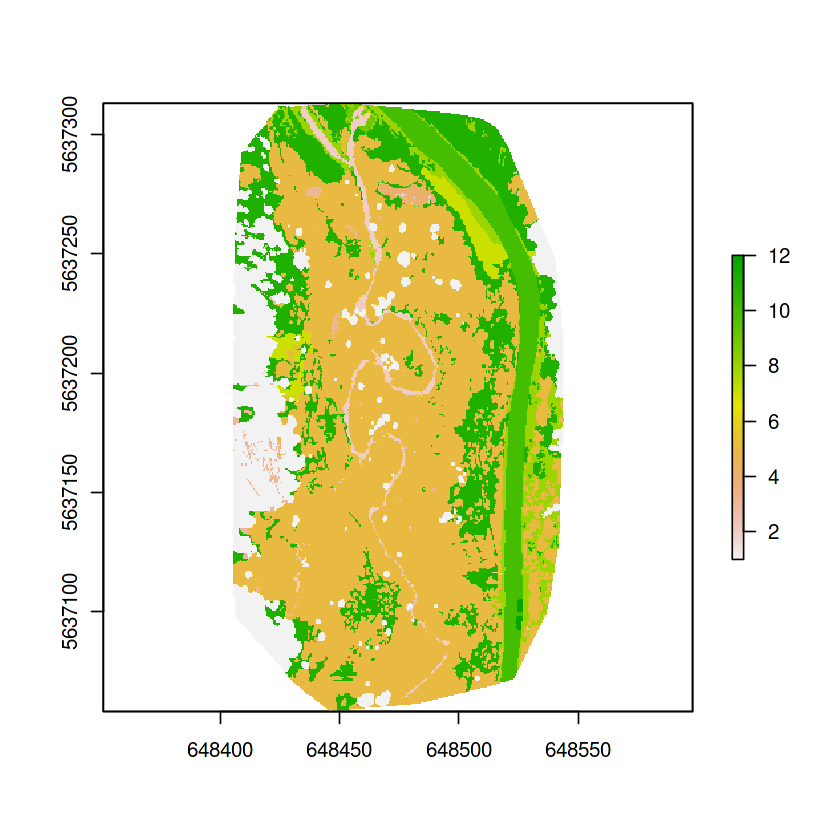

In [27]:
plot(raster(rast_stack, layer=1))

Confirm we can get the total number of rasters in the stack using the `nlayers()` function.

In [29]:
nlayers(rast_stack)

[1] 4

Now loop through the raster stack and multiply the weight by every value in the raster to generate a new raster and store it in our new stack called `weightedRast_Stack`.

In [30]:
weightedRast_Stack <- stack()

for(i in 1:nlayers(rast_stack)) {
    weightedRast_Stack <- addLayer(weightedRast_Stack, wgt_set[i]*raster(rast_stack, layer=i))
}


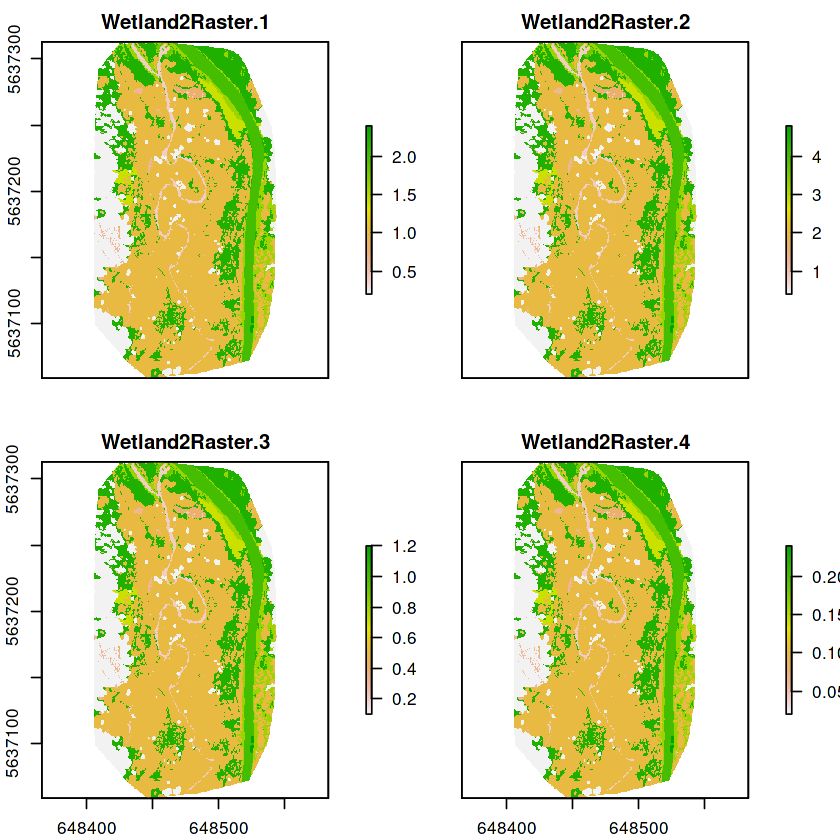

In [31]:
plot(weightedRast_Stack)

Now that you have a stack with all the weights, you just have to add them together.

Good luck!